<a href="https://colab.research.google.com/github/ikfinakmlya/capstone_datascience/blob/main/Capstone_Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ikfina Kamaliya Rizqi - A11.2022.14170

# 1. EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [ ]:
# Load the dataset
file_path = "ObesityDataSet.csv"
df = pd.read_csv(file_path)

In [ ]:
# 1. Tampilkan beberapa baris pertama dan informasi umum dataset
print("5 baris pertama:")
print(df.head(5))

5 baris pertama:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  


In [ ]:
# Tampilkan jumlah baris dan kolom
print("\nJumlah baris dan kolom:")
print(f"{df.shape[0]} baris, {df.shape[1]} kolom")


Jumlah baris dan kolom:
2111 baris, 17 kolom


In [ ]:
# Tipe data
df = df.replace('?', np.nan)
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kol in kolom_numerik:
    df[kol] = pd.to_numeric(df[kol], errors='coerce')
print("\nTIPE DATA:")
print(df.dtypes)


TIPE DATA:
Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [ ]:
# Tampilkan deskripsi statistik data numerik
print("\nDeskripsi data numerik:")
print(df.describe())


Deskripsi data numerik:
               Age       Height       Weight         FCVC          NCP  \
count  2089.000000  2089.000000  2092.000000  2093.000000  2089.000000   
mean     24.717928     1.706623    88.608184     2.443519     2.729418   
std       8.391323     0.117700    36.154617     0.642754     0.981124   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.955257     1.630000    66.000000     2.000000     2.675411   
50%      22.814657     1.701284    83.000000     2.397284     3.000000   
75%      26.000000     1.770000   108.055736     3.000000     3.000000   
max     106.441252     2.853986   441.131078     8.706795    12.299828   

              CH2O          FAF          TUE  
count  2096.000000  2092.000000  2096.000000  
mean      2.030560     1.073435     0.680138  
std       0.737945     1.149364     0.717160  
min       1.000000     0.000000     0.000000  
25%       1.569911     0.129009     0.000000  
50%       2.000000     1.0

In [ ]:
# Untuk data kategorikal juga bisa tambahkan:
print("\nDeskripsi data kategorikal:")
print(df.describe(include=['object']))


Deskripsi data kategorikal:
       Gender       CALC  FAVC   SCC SMOKE family_history_with_overweight  \
count    2089       2091  2089  2093  2098                           2088   
unique      2          4     2     2     2                              2   
top      Male  Sometimes   yes    no    no                            yes   
freq     1056       1386  1844  1997  2054                           1705   

             CAEC                 MTRANS      NObeyesdad  
count        2093                   2099            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1747                   1572             351  


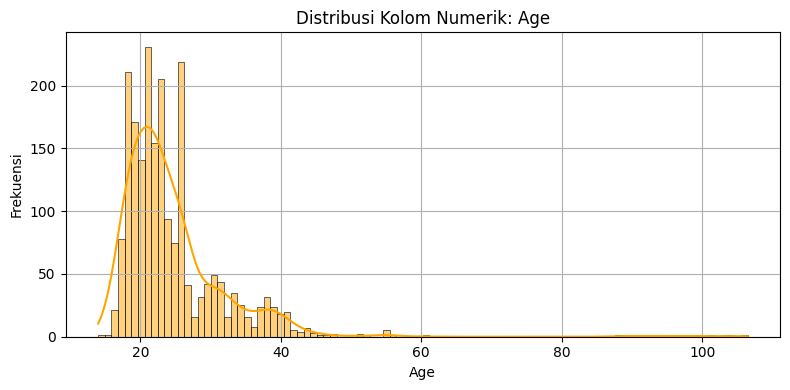

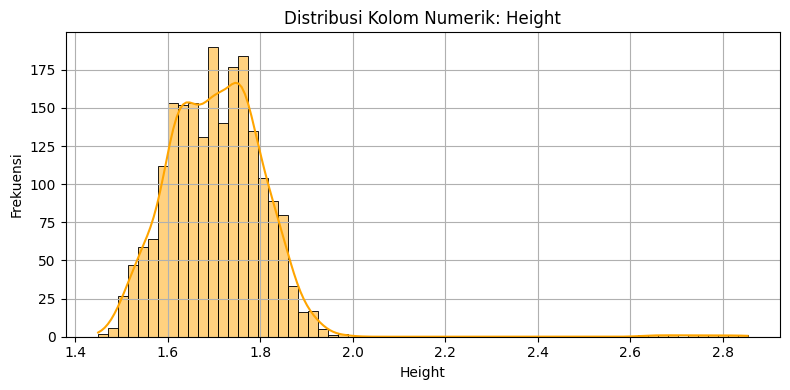

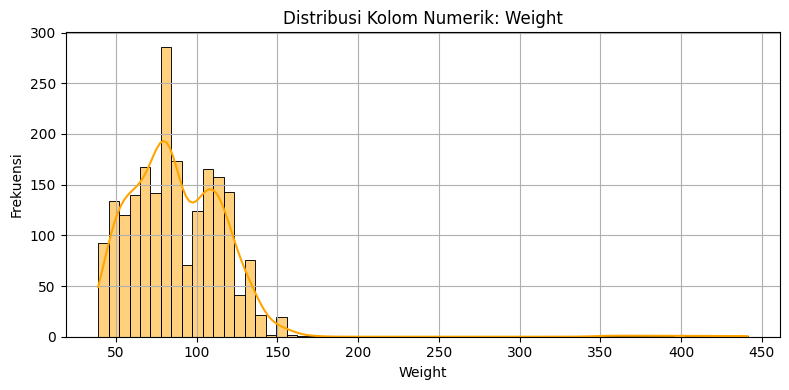

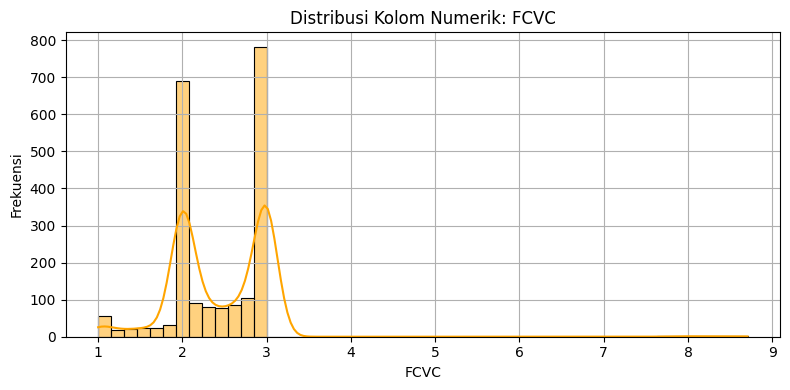

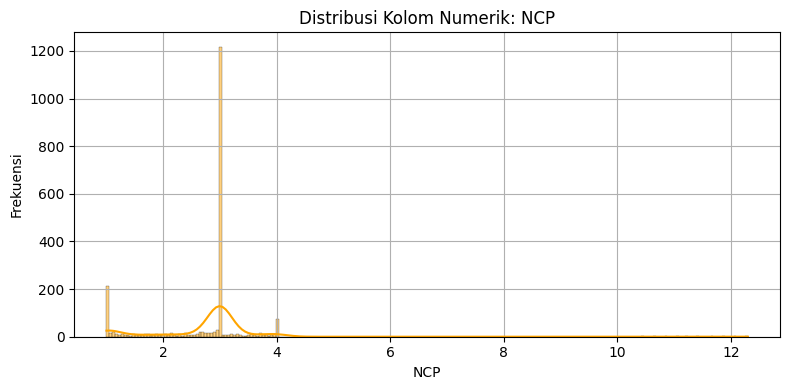

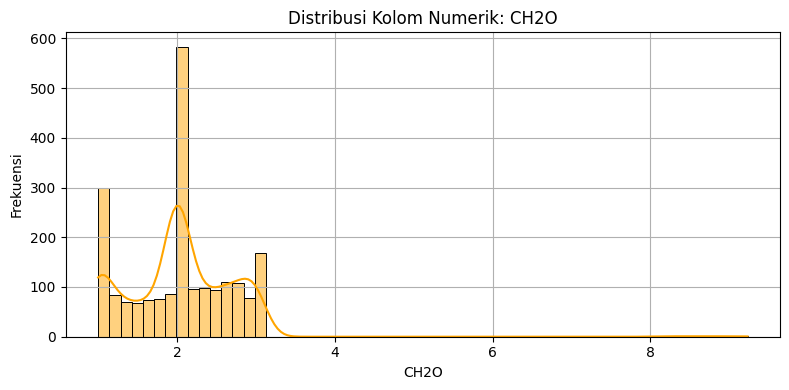

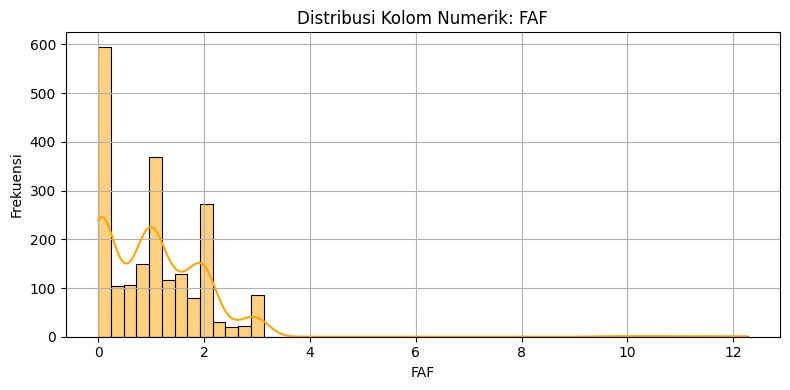

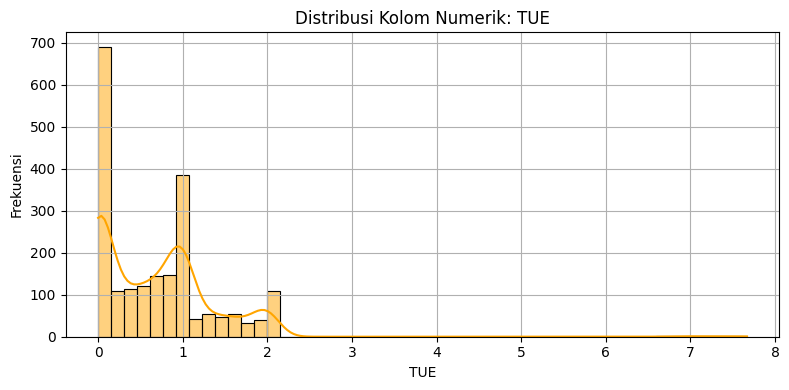

In [ ]:
# Visualisasi kolom numerik
# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Looping buat plot histogram tiap kolom numerik
for col in numerik_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Distribusi Kolom Numerik: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


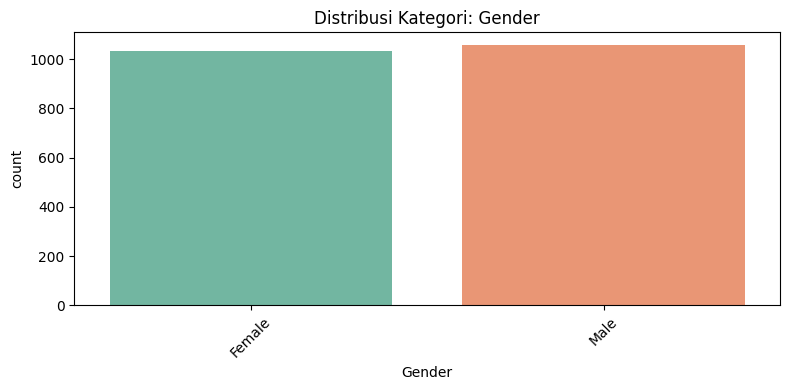

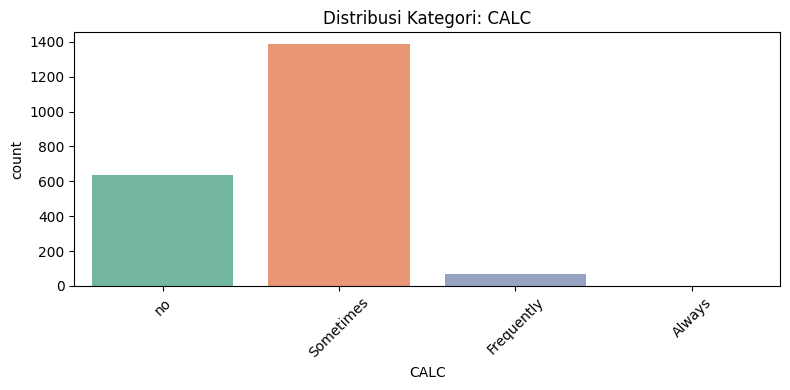

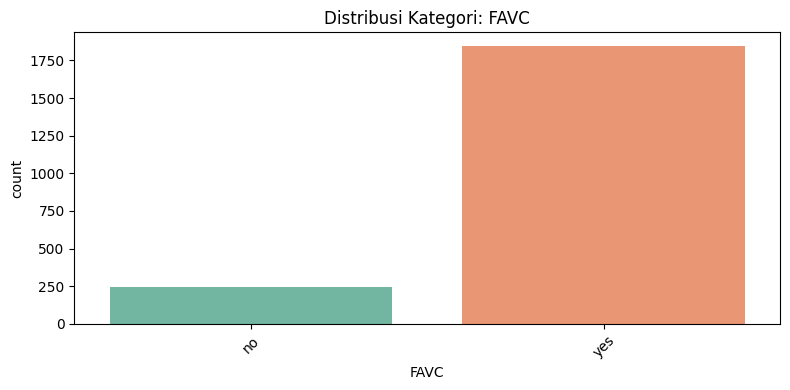

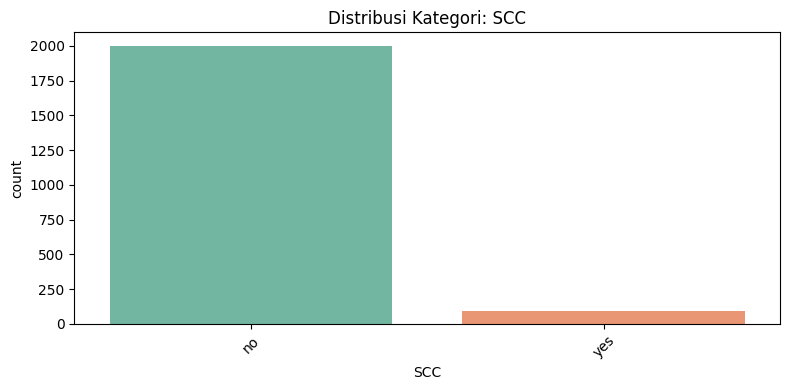

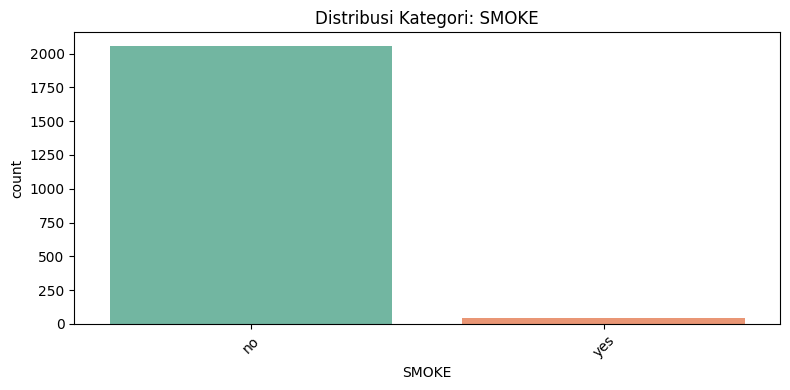

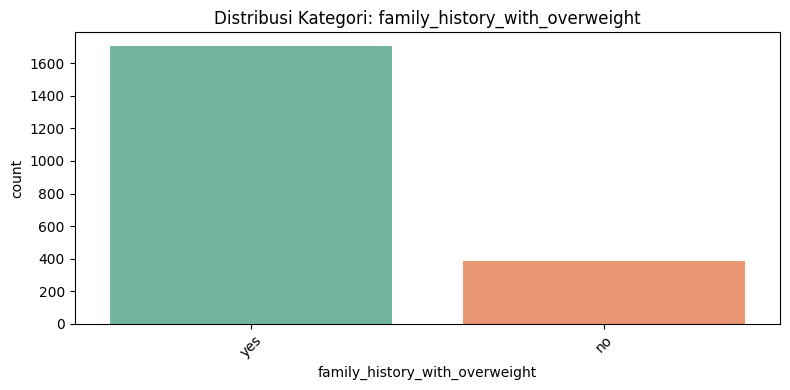

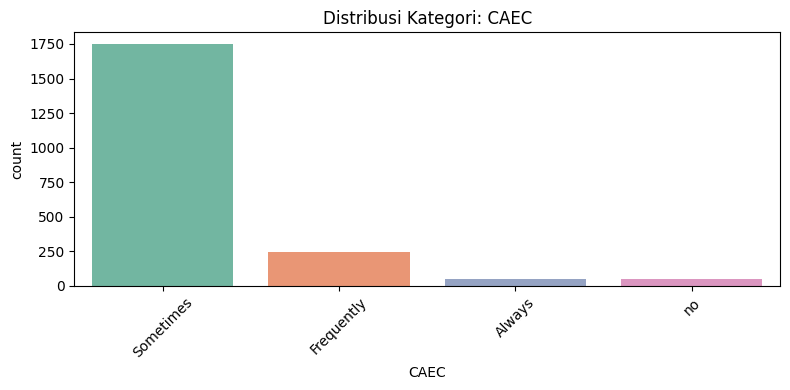

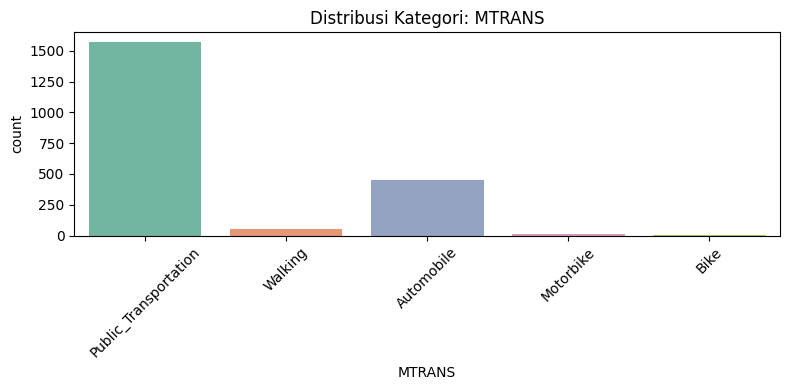

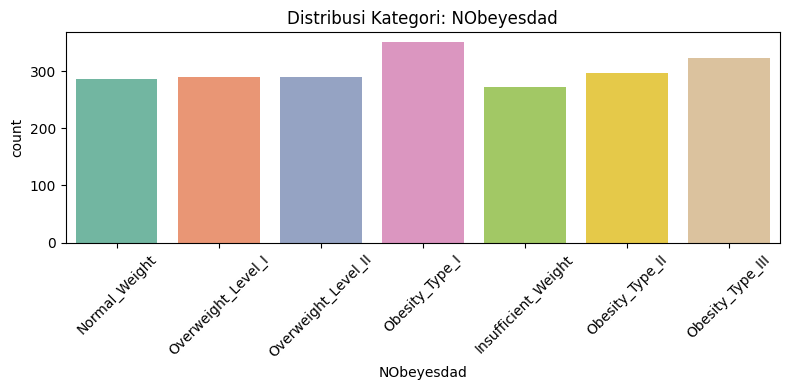

In [ ]:
# Visualisasi kolom kategorikal

warnings.simplefilter(action='ignore', category=FutureWarning)

# Pilih kolom kategorikal
kategori_cols = df.select_dtypes(include=['object', 'category']).columns

# Looping buat plot countplot tiap kolom kategorikal
for col in kategori_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Cek Missing Values
print("Cek Missing Values:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())


Cek Missing Values:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

Total missing values: 300


In [ ]:
# Cek Unique Values per Kolom
print("\nCek Unique Values per Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Cek Unique Values per Kolom:
Age: 1393
Gender: 2
Height: 1561
Weight: 1517
CALC: 4
FAVC: 2
FCVC: 807
NCP: 636
SCC: 2
SMOKE: 2
CH2O: 1262
family_history_with_overweight: 2
FAF: 1185
TUE: 1129
CAEC: 4
MTRANS: 5
NObeyesdad: 7


In [ ]:
# Cek Data Duplikat
print(f"Cek Jumlah data duplikat: {df.duplicated().sum()}")

Cek Jumlah data duplikat: 18


Keseimbangan Data - Kolom Kategorikal

Distribusi Gender:
Gender
Male      50.550503
Female    49.449497
Name: proportion, dtype: float64


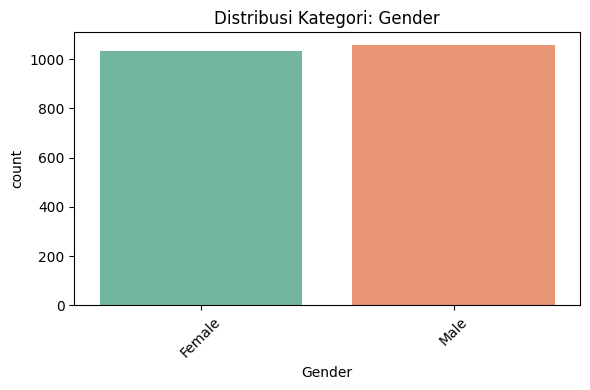


Distribusi CALC:
CALC
Sometimes     66.284075
no            30.320421
Frequently     3.347681
Always         0.047824
Name: proportion, dtype: float64


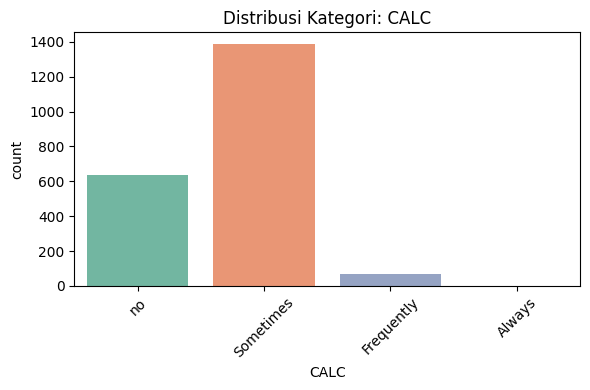


Distribusi FAVC:
FAVC
yes    88.2719
no     11.7281
Name: proportion, dtype: float64


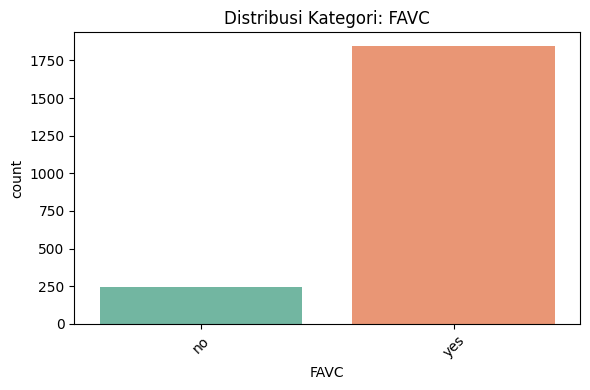


Distribusi SCC:
SCC
no     95.413282
yes     4.586718
Name: proportion, dtype: float64


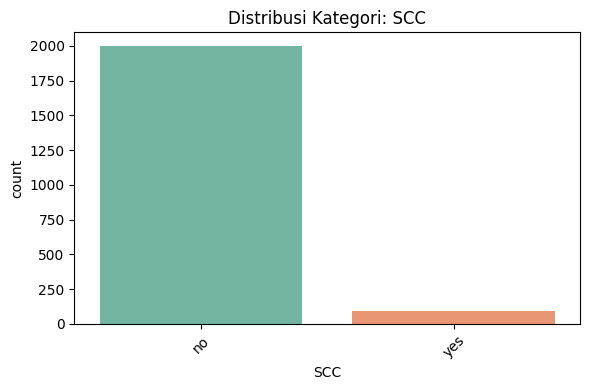


Distribusi SMOKE:
SMOKE
no     97.902765
yes     2.097235
Name: proportion, dtype: float64


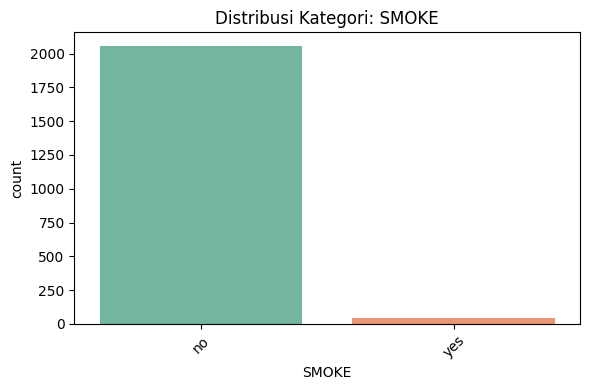


Distribusi family_history_with_overweight:
family_history_with_overweight
yes    81.657088
no     18.342912
Name: proportion, dtype: float64


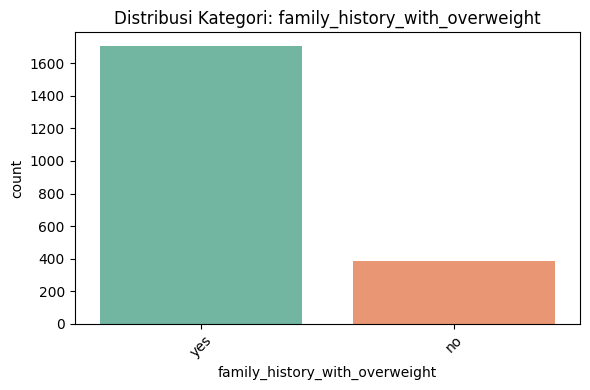


Distribusi CAEC:
CAEC
Sometimes     83.468705
Frequently    11.562351
Always         2.532250
no             2.436694
Name: proportion, dtype: float64


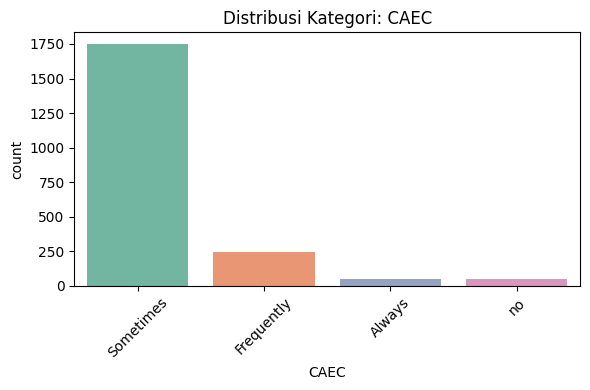


Distribusi MTRANS:
MTRANS
Public_Transportation    74.892806
Automobile               21.581706
Walking                   2.667937
Motorbike                 0.524059
Bike                      0.333492
Name: proportion, dtype: float64


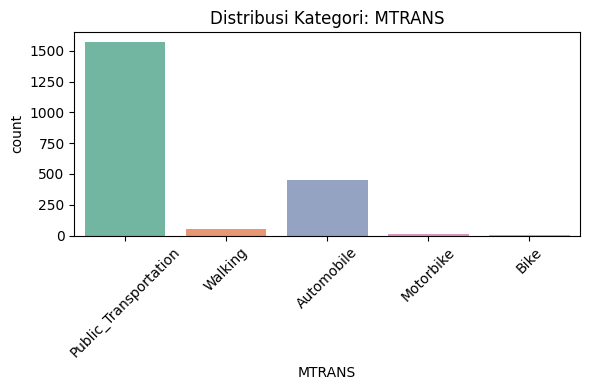


Distribusi NObeyesdad:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64


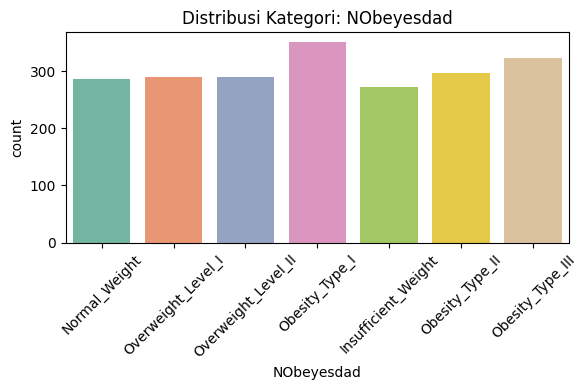


Keseimbangan Data - Kolom Numerik


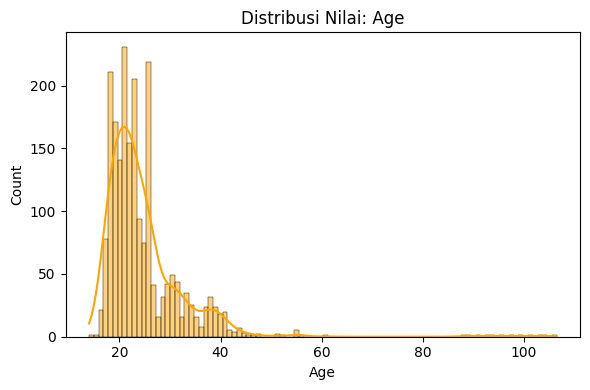

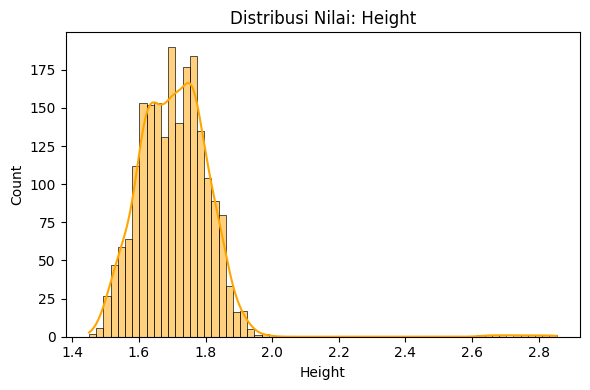

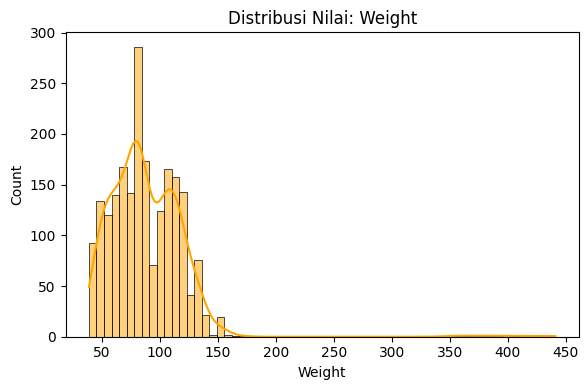

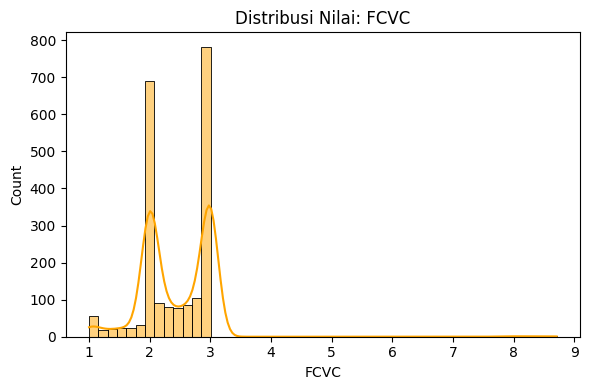

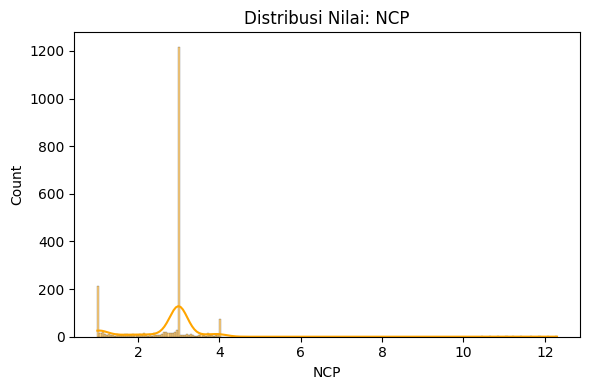

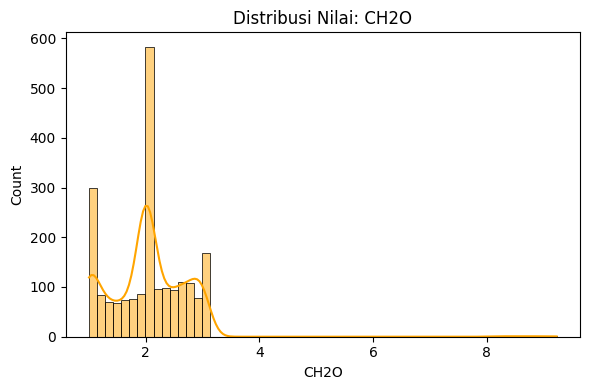

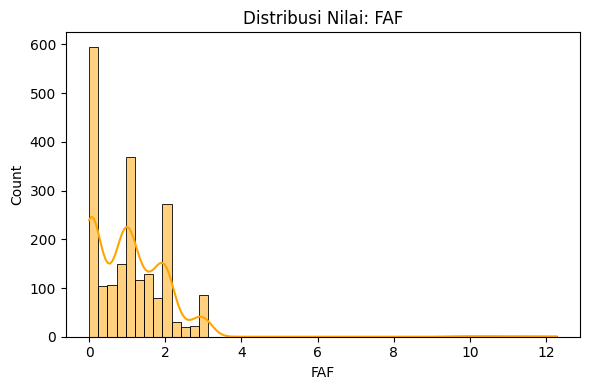

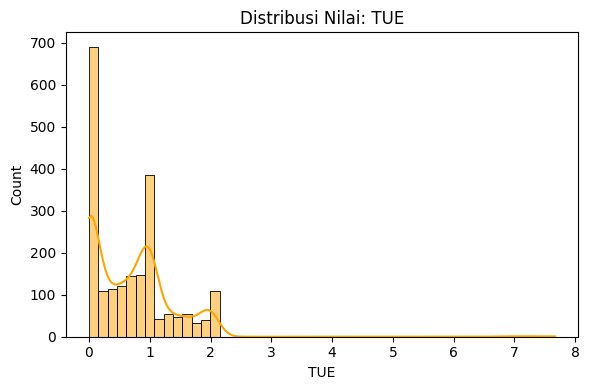

In [ ]:
#Cek keseimbangan seluruh dataset

# Pisahkan kolom numerik & kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns
kategori_cols = df.select_dtypes(include=['object', 'category']).columns

# Cek Keseimbangan Kolom Kategorikal
print("Keseimbangan Data - Kolom Kategorikal")
for col in kategori_cols:
    print(f"\nDistribusi {col}:")
    print(df[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cek Keseimbangan Kolom Numerik
print("\nKeseimbangan Data - Kolom Numerik")
for col in numerik_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Distribusi Nilai: {col}')
    plt.tight_layout()
    plt.show()



Deteksi Outlier Kolom Numerik dengan Boxplot


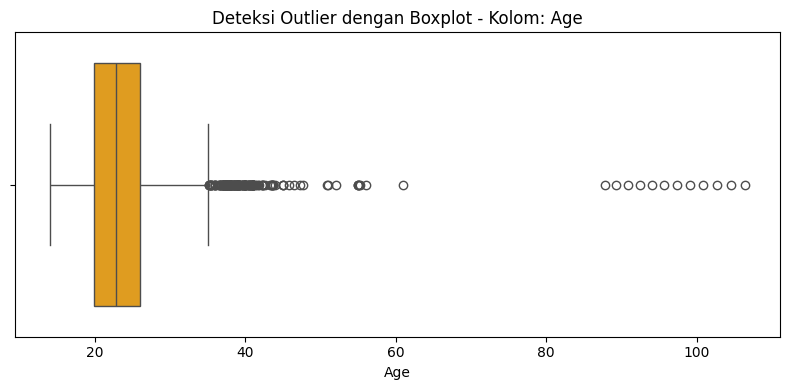

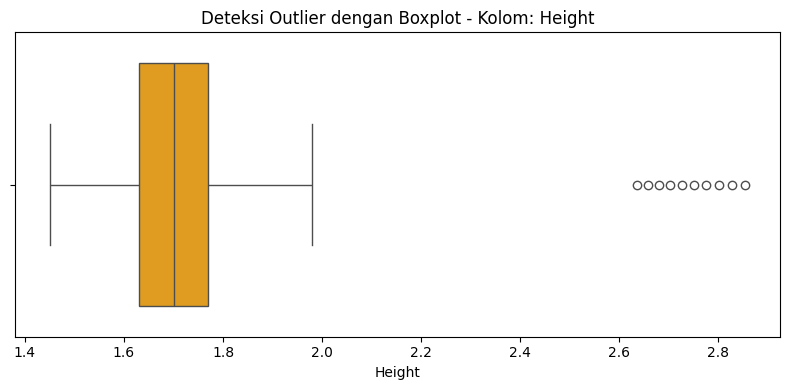

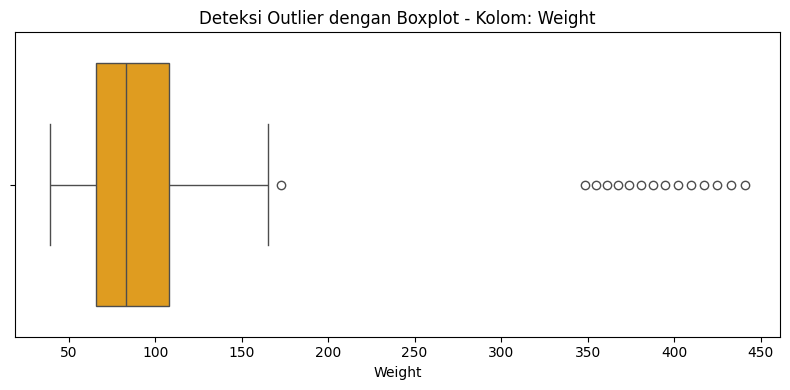

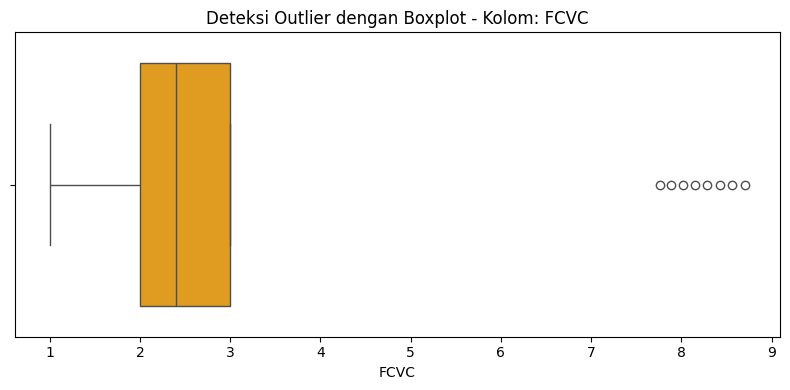

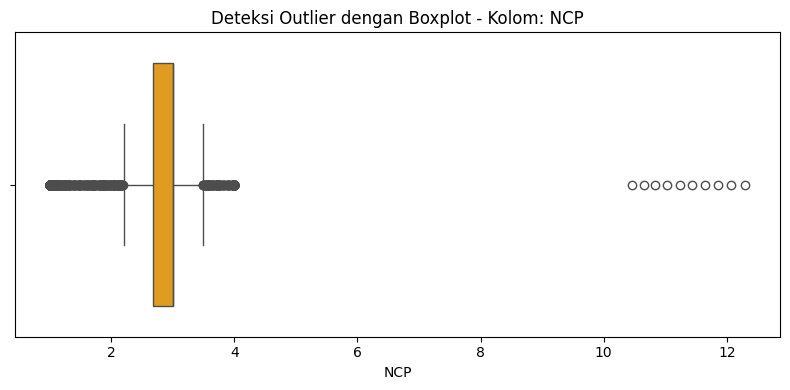

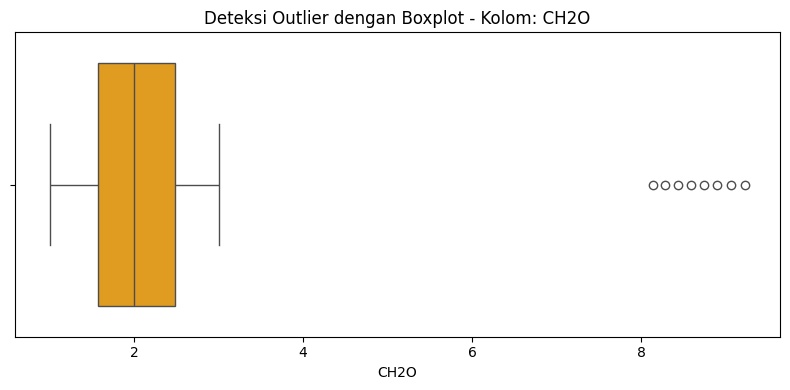

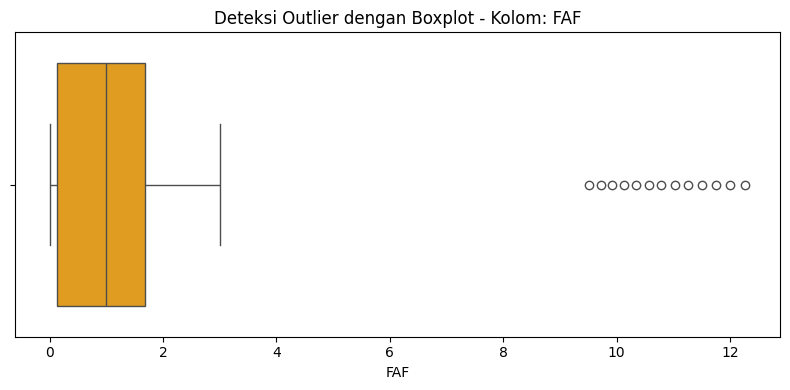

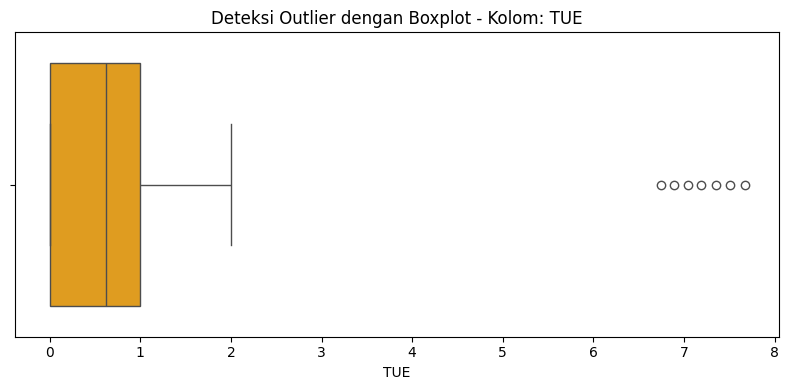

In [ ]:
# Deteksi outlier kolom numerik menggunakan boxplot
print("\nDeteksi Outlier Kolom Numerik dengan Boxplot")
# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Buat boxplot tiap kolom numerik untuk deteksi outlier
for col in numerik_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Deteksi Outlier dengan Boxplot - Kolom: {col}')
    plt.tight_layout()
    plt.show()



Kesimpulan:

Dataset ini terdiri dari 2111 baris dan 17 kolom yang meliputi berbagai atribut seperti Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family\_history\_with\_overweight, FAF, TUE, CAEC, MTRANS, dan NObeyesdad. Dalam proses eksplorasi data ditemukan adanya 300 nilai missing yang tersebar di seluruh kolom serta 18 baris data duplikat yang perlu diatasi agar kualitas data tetap terjaga. Selain itu, deteksi outlier dilakukan khusus pada kolom numerik yaitu Age, Height, Weight, FCVC, NCP, CH2O, FAF, dan TUE menggunakan boxplot untuk mengidentifikasi nilai-nilai ekstrim yang berpotensi memengaruhi analisis lebih lanjut.


# 2. Preprocessing Data

In [ ]:
# Cek missing values dan imputasi
# Contoh pendekatan sederhana: Imputasi berdasarkan tipe data
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"Kolom '{col}' (tipe object) diisi dengan modus: {mode_val}")
        else:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"Kolom '{col}' (tipe numerik) diisi dengan median: {median_val}")


Kolom 'Age' (tipe numerik) diisi dengan median: 22.814657
Kolom 'Gender' (tipe object) diisi dengan modus: Male
Kolom 'Height' (tipe numerik) diisi dengan median: 1.701284
Kolom 'Weight' (tipe numerik) diisi dengan median: 83.0
Kolom 'CALC' (tipe object) diisi dengan modus: Sometimes
Kolom 'FAVC' (tipe object) diisi dengan modus: yes
Kolom 'FCVC' (tipe numerik) diisi dengan median: 2.397284
Kolom 'NCP' (tipe numerik) diisi dengan median: 3.0
Kolom 'SCC' (tipe object) diisi dengan modus: no
Kolom 'SMOKE' (tipe object) diisi dengan modus: no
Kolom 'CH2O' (tipe numerik) diisi dengan median: 2.0
Kolom 'family_history_with_overweight' (tipe object) diisi dengan modus: yes
Kolom 'FAF' (tipe numerik) diisi dengan median: 1.0
Kolom 'TUE' (tipe numerik) diisi dengan median: 0.6253605
Kolom 'CAEC' (tipe object) diisi dengan modus: Sometimes
Kolom 'MTRANS' (tipe object) diisi dengan modus: Public_Transportation


In [ ]:
print("\nMissing value setelah imputasi:")
print(df.isnull().sum())
print("Total:", df.isnull().sum().sum())



Missing value setelah imputasi:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Total: 0


In [ ]:
# Tangani Duplikat
print(f"\nJumlah Duplikasi Sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah Duplikasi Setelah: {df.duplicated().sum()}")


Jumlah Duplikasi Sebelum: 20
Jumlah Duplikasi Setelah: 0


In [ ]:
# Tangani Eror (Contoh validasi kolom numerik tidak bernilai negatif (misalnya kolom umur atau harga))
for col in df.select_dtypes(include=np.number).columns:
    if (df[col] < 0).any():
        print(f"Error nilai negatif ditemukan di kolom: {col}, akan diganti dengan median")
        df.loc[df[col] < 0, col] = df[col].median()


In [ ]:
# Tangani Outlier
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Terapkan pada semua kolom numerik
for col in df.select_dtypes(include=np.number).columns:
    original_len = len(df)
    df = remove_outliers_iqr(df, col)
    print(f"Outlier dihapus dari kolom '{col}': {original_len - len(df)} baris")

Outlier dihapus dari kolom 'Age': 179 baris
Outlier dihapus dari kolom 'Height': 12 baris
Outlier dihapus dari kolom 'Weight': 14 baris
Outlier dihapus dari kolom 'FCVC': 6 baris
Outlier dihapus dari kolom 'NCP': 545 baris
Outlier dihapus dari kolom 'CH2O': 5 baris
Outlier dihapus dari kolom 'FAF': 9 baris
Outlier dihapus dari kolom 'TUE': 5 baris


In [ ]:
# Cek kolom kategorik
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kolom kategorik:", list(categorical_cols))

# Pilih metode
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("Semua kolom kategorik diubah jadi numerik dengan one-hot encoding.")
else:
    print("Tidak ada kolom kategorik yang perlu dikonversi.")


Kolom kategorik: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
Semua kolom kategorik diubah jadi numerik dengan one-hot encoding.


In [ ]:
print(df.info())  # semua kolom sekarang numerik (int/float)


<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 2110
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1316 non-null   float64
 1   Height                              1316 non-null   float64
 2   Weight                              1316 non-null   float64
 3   FCVC                                1316 non-null   float64
 4   NCP                                 1316 non-null   float64
 5   CH2O                                1316 non-null   float64
 6   FAF                                 1316 non-null   float64
 7   TUE                                 1316 non-null   float64
 8   Gender_Male                         1316 non-null   bool   
 9   CALC_Sometimes                      1316 non-null   bool   
 10  CALC_no                             1316 non-null   bool   
 11  FAVC_yes                            1316 non-nul

In [ ]:
# tentukan apakah semua feature perlu digunakan.

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Fitur dengan variansi < 1% dibuang
selector.fit(df.drop('NObeyesdad_Overweight_Level_II', axis=1))

low_variance_features = df.drop('NObeyesdad_Overweight_Level_II', axis=1).columns[~selector.get_support()]
print("Fitur variansi rendah:", list(low_variance_features))


Fitur variansi rendah: ['Height', 'MTRANS_Bike', 'MTRANS_Motorbike']


fitur-fitur ini kemungkinan besar tidak banyak memberi informasi tambahan, karena nilainya hampir sama di semua baris.

In [ ]:
df = df.drop(['Height', 'MTRANS_Bike', 'MTRANS_Motorbike'], axis=1)
print("Fitur variansi rendah sudah dihapus.")


Fitur variansi rendah sudah dihapus.


Fitur variansi rendah sudah dihapus.

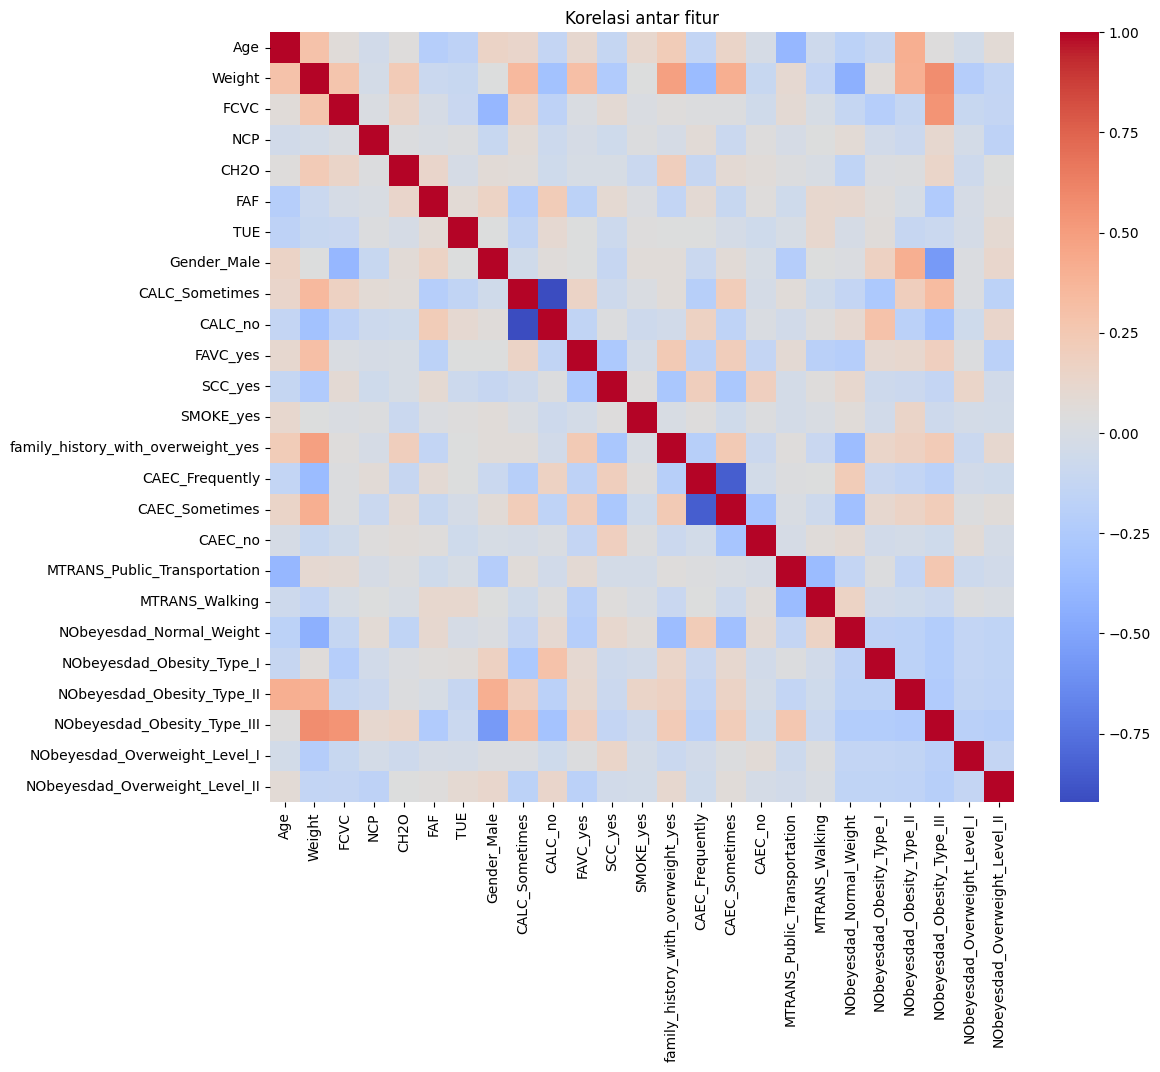

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()


In [ ]:
print(df['NObeyesdad_Overweight_Level_II'].value_counts())
print(df['NObeyesdad_Overweight_Level_II'].value_counts(normalize=True))  # dalam persen


NObeyesdad_Overweight_Level_II
False    1159
True      157
Name: count, dtype: int64
NObeyesdad_Overweight_Level_II
False    0.880699
True     0.119301
Name: proportion, dtype: float64


tidak seimbang.
Kelas True (Overweight Level II) cuma 12%, artinya model bisa bias ke kelas False.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Kolom untuk standarisasi (nilai besar, bisa negatif/positif)
standard_cols = ['Age', 'Weight']

# Kolom untuk normalisasi (range kecil dan positif)
minmax_cols = [
    'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
    'Gender_Male', 'FAVC_yes', 'SCC_yes', 'SMOKE_yes',
    'family_history_with_overweight_yes',
    'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_no', 'CALC_Sometimes'
]

# Standarisasi (Ubah data ke distribusi dengan mean=0 dan sandar deviasi=1)
print("STANDARISASI:")
scaler_std = StandardScaler()
df[standard_cols] = scaler_std.fit_transform(df[standard_cols])
print(df[standard_cols].describe())

# Normalisasi (semua nilai berada di rentang 0,1 menggunakan minmax)
print("NORMALISASI:")
scaler_mm = MinMaxScaler()
df[minmax_cols] = scaler_mm.fit_transform(df[minmax_cols])
print(df[minmax_cols].describe())

STANDARISASI:
                Age        Weight
count  1.316000e+03  1.316000e+03
mean   3.239557e-16  3.455527e-16
std    1.000380e+00  1.000380e+00
min   -2.228613e+00 -1.959285e+00
25%   -7.690703e-01 -7.833579e-01
50%   -8.438506e-02 -5.911819e-02
75%    6.847518e-01  7.523761e-01
max    2.879786e+00  2.964911e+00
NORMALISASI:
              FCVC          NCP         CH2O          FAF          TUE  \
count  1316.000000  1316.000000  1316.000000  1316.000000  1316.000000   
mean      0.731586     0.598673     0.528739     0.342943     0.347437   
std       0.273791     0.116977     0.300697     0.284107     0.292054   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.500000     0.621261     0.354405     0.051621     0.062349   
50%       0.790713     0.621261     0.500000     0.333333     0.340876   
75%       1.000000     0.621261     0.775551     0.536838     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   



Kesimpulan:

Setelah dilakukan proses pembersihan data, tidak ditemukan missing value karena seluruh nilai yang kosong telah berhasil diimputasi. Selain itu, sebanyak 20 baris duplikat berhasil dihapus untuk menghindari redundansi data. Outlier pada beberapa kolom seperti Age, Height, Weight, dan lain-lain juga telah diidentifikasi dan dihapus guna meningkatkan kualitas dan keandalan model. Data kategorik yang terdapat pada kolom seperti Gender, CALC, FAVC, SCC, SMOKE, family\_history\_with\_overweight, CAEC, MTRANS, dan NObeyesdad telah diubah menjadi bentuk numerik menggunakan teknik One-Hot Encoding agar bisa diproses oleh model machine learning. Selanjutnya, dilakukan seleksi fitur dengan metode Variance Threshold, dan fitur dengan variansi rendah seperti Height, MTRANS\_Bike, dan MTRANS\_Motorbike telah dihapus karena dianggap tidak memberikan informasi yang signifikan. Distribusi target kelas pada label NObeyesdad\_Overweight\_Level\_II menunjukkan ketidakseimbangan yang signifikan, dengan hanya 12% data termasuk dalam kelas True, yang berarti perlu penanganan khusus pada tahap modeling agar model tidak bias terhadap kelas mayoritas. Terakhir, dilakukan standarisasi menggunakan StandardScaler pada kolom Age dan Weight untuk mengubah distribusi menjadi memiliki mean 0 dan standar deviasi 1, serta normalisasi menggunakan MinMaxScaler pada kolom seperti FCVC, NCP, CH2O, FAF, TUE, dan beberapa kolom dummy lainnya untuk menyamakan skala nilai dalam rentang 0 hingga 1.


# 3. Pemodelan dan Evaluasi

print(df.columns.tolist())

In [ ]:
print(df.columns.tolist())

['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male', 'CALC_Sometimes', 'CALC_no', 'FAVC_yes', 'SCC_yes', 'SMOKE_yes', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']


In [ ]:
# Gabungkan kolom one-hot target menjadi 1 kolom label
target_cols = ['NObeyesdad_Normal_Weight',
               'NObeyesdad_Obesity_Type_I',
               'NObeyesdad_Obesity_Type_II',
               'NObeyesdad_Obesity_Type_III',
               'NObeyesdad_Overweight_Level_I',
               'NObeyesdad_Overweight_Level_II']

# Ambil X (fitur) dan y (label)
X = df.drop(columns=target_cols)
y = df[target_cols].idxmax(axis=1)  # Ambil nama kolom target yang nilainya 1

# Contoh hasil y: 'NObeyesdad_Obesity_Type_I'
# Kalau mau bersihin prefixnya:
y = y.str.replace('NObeyesdad_', '')

# Lanjut split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

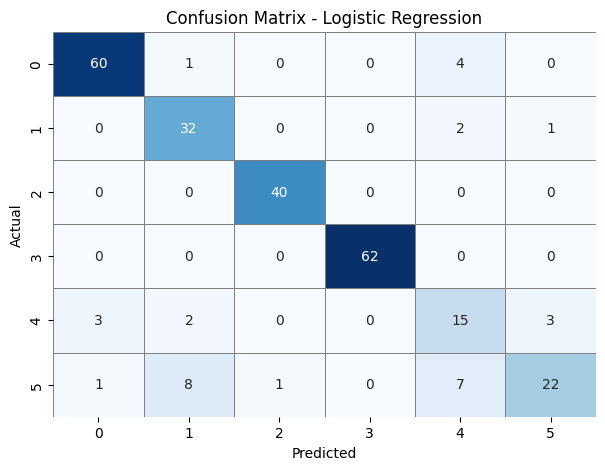

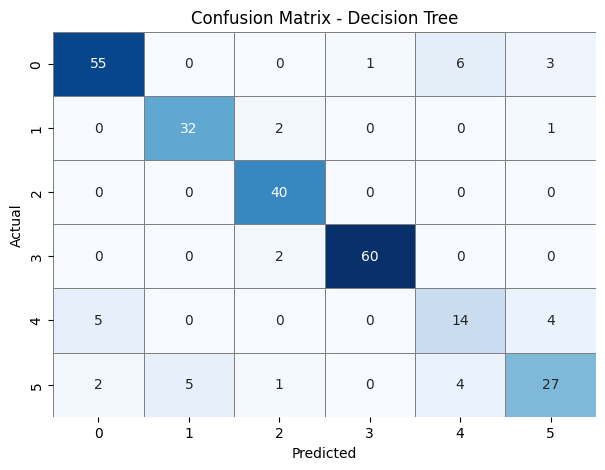

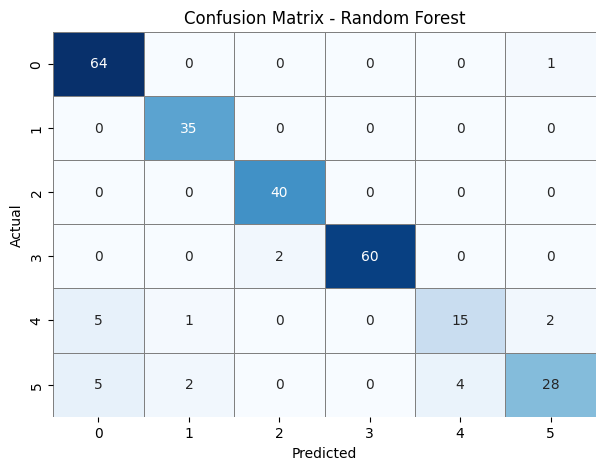


Tabel Perbandingan Model:
      Metric  Logistic Regression   Decision Tree   Random Forest
    Accuracy               0.8750          0.8636          0.9167
   Precision               0.8838          0.8635          0.9164
      Recall               0.8750          0.8636          0.9167
    F1-Score               0.8736          0.8625          0.9131


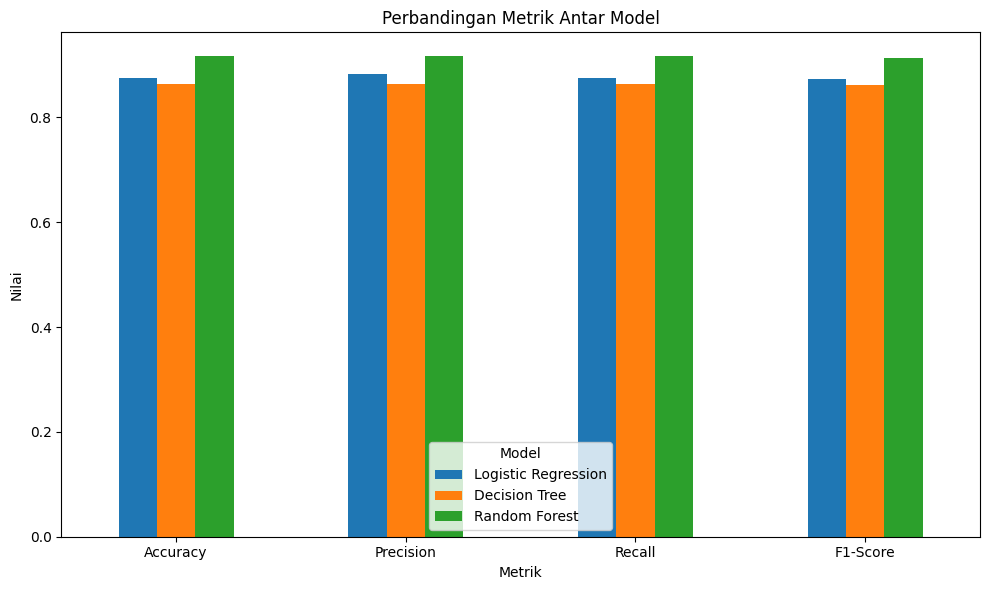

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

# Decision Tree
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Random Forest
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

# Fungsi untuk menghitung metrik evaluasi dan visualisasi confusion matrix
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')  # Baris
    plt.xlabel('Predicted')  # Kolom
    plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Evaluasi masing-masing model
results = []
results.append(evaluate_model(y_test, y_pred_logreg, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_tree, "Decision Tree"))
results.append(evaluate_model(y_test, y_pred_forest, "Random Forest"))

# Membuat tabel perbandingan
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [results[0]['Accuracy'], results[0]['Precision'], results[0]['Recall'], results[0]['F1-Score']],
    'Decision Tree': [results[1]['Accuracy'], results[1]['Precision'], results[1]['Recall'], results[1]['F1-Score']],
    'Random Forest': [results[2]['Accuracy'], results[2]['Precision'], results[2]['Recall'], results[2]['F1-Score']]
})

# Menampilkan tabel s
print("\nTabel Perbandingan Model:")
col_widths = {
    'Metric': 12,
    'Logistic Regression': 20,
    'Decision Tree': 15,
    'Random Forest': 15
}
formatted_table = results_df.to_string(index=False, formatters={
    'Logistic Regression': '{:.4f}'.format,
    'Decision Tree': '{:.4f}'.format,
    'Random Forest': '{:.4f}'.format
}, col_space=col_widths)
print(formatted_table)

# Visualisasi perbandingan metrik
results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Perbandingan Metrik Antar Model')
plt.ylabel('Nilai')
plt.xlabel('Metrik')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

Kesimpulan:

Target klasifikasi adalah kolom NObeyesdad, yang awalnya diubah menjadi one-hot encoding dengan enam kelas: Normal_Weight, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Overweight_Level_I, dan Overweight_Level_II. Setelah preprocessing, prefiks NObeyesdad_ dihapus untuk menyederhanakan label menjadi Normal_Weight, Obesity_Type_I, dan seterusnya.
Proses dimulai dengan pemisahan fitur X dari semua kolom kecuali target, sementara target y dihasilkan dengan idxmax() untuk memilih kelas dengan nilai 1 dari one-hot encoding.
Data kemudian dibagi menjadi data latih X_train, y_train dan data uji X_test, y_test dengan rasio 80:20 untuk memastikan konsistensi.
Karena ini adalah klasifikasi multi-kelas dengan enam kelas, "Actual" merujuk pada label asli dari data uji y_test, sedangkan "Predicted" adalah tebakan model berdasarkan data latih, yang dibandingkan dalam confusion matrix untuk mengevaluasi performa.

Tiga model klasifikasi diterapkan: Logistic Regression, Decision Tree, dan Random Forest. Setiap model dilatih, lalu evaluasi dilakukan untuk menangani ketidakseimbangan kelas.
Berdasarkan hasil, Random Forest menunjukkan performa terbaik dengan akurasi tertinggi sebesar 0.9167, diikuti oleh Precision 0.9164, Recall 0.9167, dan F1-Score 0.9131, menunjukkan konsistensi di atas 0.91. Logistic Regression mencatat akurasi 0.8750 dengan Precision 0.8838, Recall 0.8750, dan F1-Score 0.8736, sementara Decision Tree memiliki akurasi 0.8636 dengan Precision 0.8635, Recall 0.8636, dan F1-Score 0.8635.
Hasil ini mengindikasikan bahwa Random Forest lebih unggul dalam memprediksi tingkat obesitas dibandingkan kedua model lain, kemungkinan karena kemampuannya menangkap pola kompleks melalui ensembel pohon keputusan.

# 4. Hyperparameter Tuning

untuk menemukan kombinasi parameter terbaik yang memberikan performa optimal pada model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Grid Search untuk Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10], #Logistic Regression
    # C= inverse dari regularization strength (kebalikan dari kekuatan regularisasi).
    'solver': ['lbfgs', 'liblinear']
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
print("Best Logistic Regression:", grid_logreg.best_params_)

# 2. Grid Search untuk Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
     #menentukan fungsi yang digunakan untuk mengukur kualitas pemisahan di setiap pohon, pemilihan standar
    'max_depth': [None, 5, 10, 20], #Decision Tree dan Random Forest
     #10: Kedalaman sedang untuk mengurangi risiko overfitting,
    #20: Kedalaman lebih dalam untuk menangkap pola yang lebih kompleks, tetapi masih dibatasi.
    'min_samples_split': [2, 5, 10] #Nilai minimum, Membutuhkan setidaknya 5 sampel, Membutuhkan 10 sampel, lebih konservatif dan cocok untuk dataset dengan noise.
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid_tree, cv=5, n_jobs=-1, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("Best Decision Tree:", grid_tree.best_params_)

# 3. Grid Search untuk Random Forest
param_grid_forest = {
    'n_estimators': [50, 100, 150], # Random Forest
    #50: Jumlah pohon kecil untuk model yang lebih cepat, cocok untuk eksperimen awal.
    #100: Nilai standar yang sering digunakan sebagai baseline, memberikan keseimbangan antara performa dan waktu.
    #150: Nilai lebih besar untuk melihat apakah menambah pohon meningkatkan akurasi.
    #jumlah pohon keputusan yang dibuat dalam Random Forest
    'max_depth': [None, 10, 20], # Decision Tree dan Random Forest,
    #10: Kedalaman sedang untuk mengurangi risiko overfitting,
    #20: Kedalaman lebih dalam untuk menangkap pola yang lebih kompleks, tetapi masih dibatasi.
    'min_samples_split': [2, 5], #nilai minimum, 5 sampel untuk berbagi node
    'criterion': ['gini', 'entropy']
    #menentukan fungsi yang digunakan untuk mengukur kualitas pemisahan di setiap pohon, pemilihan standar
}

grid_forest = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid_forest, cv=5, n_jobs=-1, scoring='accuracy')
grid_forest.fit(X_train, y_train)
print("Best Random Forest:", grid_forest.best_params_)

Best Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Best Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


- Logistic :
  - C=10 ; regularisasi lemah → model boleh lebih fleksibel.
  - solver: 'lbfgs' Parameter solver menentukan algoritma optimasi yang digunakan untuk melatih model.

- Decision:
  - criterion: menentukan metrik yang digunakan untuk membagi simpul (node) pada pohon keputusan.
  - entropy menggunakan Information Gain berdasarkan entropi (ukuran ketidakpastian).
  Ini berarti model memilih pemisahan yang paling mengurangi ketidakpastian dalam data.
  - max_depth: untuk mengontrol kedalaman maksimum pohon.
  - None berarti pohon akan berkembang hingga semua daun murni (tidak ada campuran kelas)
  - min_samples_split: menentukan jumlah minimum sampel yang diperlukan untuk membagi simpul.
  - Nilai 5 berarti simpul hanya akan dibagi jika ada setidaknya 5 sampel di simpul tersebut.

- Random:
  - criterion dan max depth sama kaya decision
  - min_samples_split: 2
  - Nilai 2 adalah default untuk Random Forest, yang berarti simpul akan dibagi selama ada minimal 2 sampel.
  - n_estimators: menentukan jumlah pohon dalam Random Forest.
  - Nilai 100 adalah pilihan yang umum dan seimbang—cukup banyak untuk memastikan stabilitas prediksi melalui voting,


Perbandingan untuk Logistic Regression:
Sebelum Tuning - Accuracy: 0.8750, Precision: 0.8838, Recall: 0.8750, F1-Score: 0.8736
Setelah Tuning - Accuracy: 0.8939, Precision: 0.9053, Recall: 0.8939, F1-Score: 0.8935
Peningkatan Akurasi: 0.0189
Peningkatan Precision: 0.0214
Peningkatan Recall: 0.0189
Peningkatan F1-Score: 0.0199


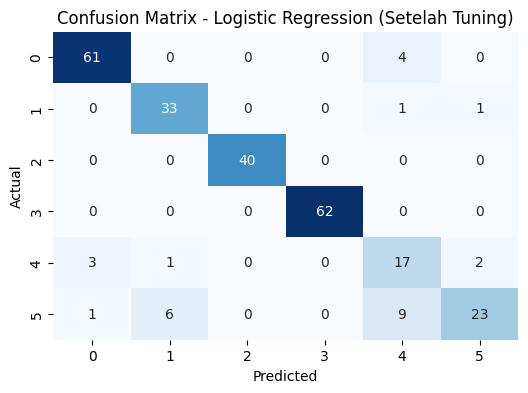


Perbandingan untuk Decision Tree:
Sebelum Tuning - Accuracy: 0.8636, Precision: 0.8635, Recall: 0.8636, F1-Score: 0.8625
Setelah Tuning - Accuracy: 0.9053, Precision: 0.9081, Recall: 0.9053, F1-Score: 0.9057
Peningkatan Akurasi: 0.0417
Peningkatan Precision: 0.0446
Peningkatan Recall: 0.0417
Peningkatan F1-Score: 0.0432


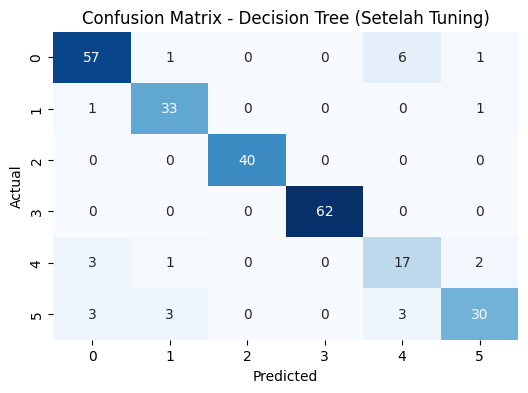


Perbandingan untuk Random Forest:
Sebelum Tuning - Accuracy: 0.9167, Precision: 0.9164, Recall: 0.9167, F1-Score: 0.9131
Setelah Tuning - Accuracy: 0.9470, Precision: 0.9472, Recall: 0.9470, F1-Score: 0.9455
Peningkatan Akurasi: 0.0303
Peningkatan Precision: 0.0308
Peningkatan Recall: 0.0303
Peningkatan F1-Score: 0.0324


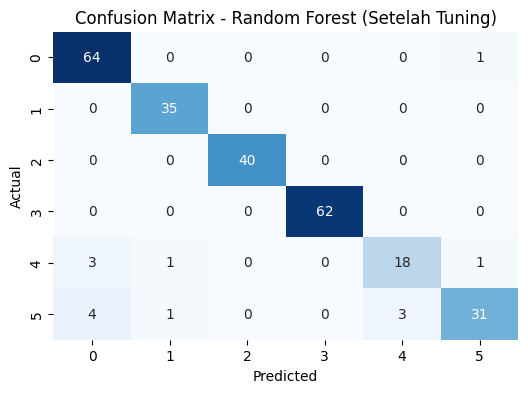


Performa Model Sebelum Tuning
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.875000   0.883825  0.875000  0.873555
1        Decision Tree  0.863636   0.863534  0.863636  0.862526
2        Random Forest  0.916667   0.916409  0.916667  0.913085

Performa Model Sesudah Tuning
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.893939   0.905257  0.893939  0.893490
1        Decision Tree  0.905303   0.908089  0.905303  0.905681
2        Random Forest  0.946970   0.947160  0.946970  0.945476


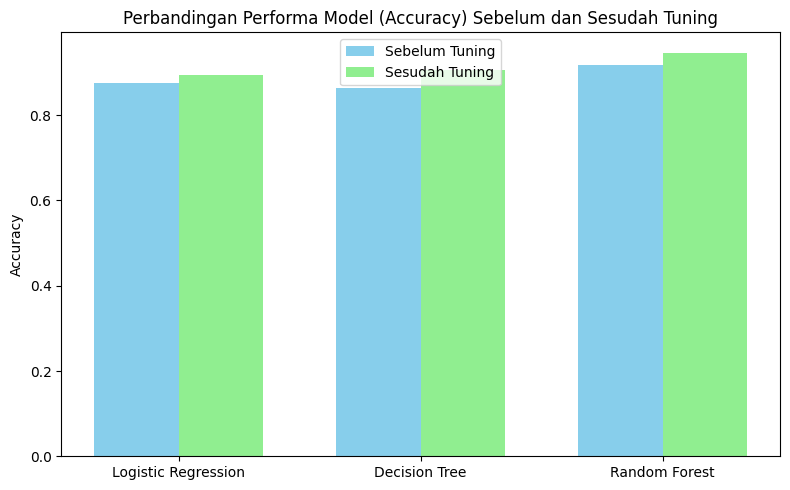

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simpan performa sebelum tuning (model dengan parameter default)
model_logreg_before = LogisticRegression(max_iter=1000, random_state=42)
model_logreg_before.fit(X_train, y_train)
y_pred_logreg_before = model_logreg_before.predict(X_test)

model_tree_before = DecisionTreeClassifier(random_state=42)
model_tree_before.fit(X_train, y_train)
y_pred_tree_before = model_tree_before.predict(X_test)

model_forest_before = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest_before.fit(X_train, y_train)
y_pred_forest_before = model_forest_before.predict(X_test)

# Latih ulang model dengan hyperparameter terbaik
# Logistic Regression
model_logreg = LogisticRegression(C=10, solver='lbfgs', max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

# Decision Tree
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=5, random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Random Forest
model_forest = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

# Fungsi untuk evaluasi dan visualisasi
def evaluate_model(y_test, y_pred, model_name, y_pred_before=None):
    # Metrik setelah tuning
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Metrik sebelum tuning
    accuracy_before = None
    precision_before = None
    recall_before = None
    f1_before = None

    if y_pred_before is not None:
        accuracy_before = accuracy_score(y_test, y_pred_before)
        precision_before = precision_score(y_test, y_pred_before, average='weighted', zero_division=0)
        recall_before = recall_score(y_test, y_pred_before, average='weighted', zero_division=0)
        f1_before = f1_score(y_test, y_pred_before, average='weighted', zero_division=0)

        print(f"\nPerbandingan untuk {model_name}:")
        print(f"Sebelum Tuning - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1-Score: {f1_before:.4f}")
        print(f"Setelah Tuning - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        print(f"Peningkatan Akurasi: {(accuracy - accuracy_before):.4f}")
        print(f"Peningkatan Precision: {(precision - precision_before):.4f}")
        print(f"Peningkatan Recall: {(recall - recall_before):.4f}")
        print(f"Peningkatan F1-Score: {(f1 - f1_before):.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name} (Setelah Tuning)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return {
        'Model': model_name,
        'Accuracy (Sebelum)': accuracy_before,
        'Precision (Sebelum)': precision_before,
        'Recall (Sebelum)': recall_before,
        'F1-Score (Sebelum)': f1_before,
        'Accuracy (Setelah)': accuracy,
        'Precision (Setelah)': precision,
        'Recall (Setelah)': recall,
        'F1-Score (Setelah)': f1
    }

# Evaluasi masing-masing model
results = []
results.append(evaluate_model(y_test, y_pred_logreg, "Logistic Regression", y_pred_logreg_before))
results.append(evaluate_model(y_test, y_pred_tree, "Decision Tree", y_pred_tree_before))
results.append(evaluate_model(y_test, y_pred_forest, "Random Forest", y_pred_forest_before))

# Pisahkan hasil menjadi dua tabel
before_tuning = [
    {
        'Model': result['Model'],
        'Accuracy': result['Accuracy (Sebelum)'],
        'Precision': result['Precision (Sebelum)'],
        'Recall': result['Recall (Sebelum)'],
        'F1-Score': result['F1-Score (Sebelum)']
    }
    for result in results
]
before_df = pd.DataFrame(before_tuning)

after_tuning = [
    {
        'Model': result['Model'],
        'Accuracy': result['Accuracy (Setelah)'],
        'Precision': result['Precision (Setelah)'],
        'Recall': result['Recall (Setelah)'],
        'F1-Score': result['F1-Score (Setelah)']
    }
    for result in results
]
after_df = pd.DataFrame(after_tuning)

# Tampilkan tabel
print("\nPerforma Model Sebelum Tuning")
print(before_df)
print("\nPerforma Model Sesudah Tuning")
print(after_df)

# Visualisasi perbandingan performa (hanya Accuracy)
models = before_df['Model']
accuracy_before = before_df['Accuracy']
accuracy_after = after_df['Accuracy']

x = np.arange(len(models))  # Posisi label
width = 0.35  # Lebar batang

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy_before, width, label='Sebelum Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, accuracy_after, width, label='Sesudah Tuning', color='lightgreen')

# Label dan judul
ax.set_ylabel('Accuracy')
ax.set_title('Perbandingan Performa Model (Accuracy) Sebelum dan Sesudah Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

Keisimpulan:

Proses optimasi hyperparameter dilakukan menggunakan **GridSearchCV** untuk tiga model klasifikasi.
Logistic Regression diuji dengan parameter C (kekuatan regularisasi terbalik: 0.01, 0.1, 1, 10) dan solver ('lbfgs', 'liblinear') untuk menemukan kombinasi terbaik guna meningkatkan akurasi, dengan iterasi maksimum 1000 dan seed acak 42.
Decision Tree dioptimalkan melalui parameter criterion ('gini', 'entropy'), max_depth (None, 5, 10, 20) untuk mengatur kedalaman pohon, serta min_samples_split (2, 5, 10) guna mengontrol pemisahan node, dengan fokus pada akurasi melalui validasi silang 5 lipat.
Sementara itu, Random Forest diuji dengan parameter n_estimators (50, 100, 150) untuk jumlah pohon, max_depth (None, 10, 20), min_samples_split (2, 5), dan criterion ('gini', 'entropy'), memanfaatkan semua prosesor (`n_jobs=-1`) dan validasi silang 5 lipat untuk menemukan parameter optimal.
Setelah melatih ulang model dengan parameter terbaik dan mengevaluasi kembali performanya, hasil menunjukkan peningkatan akurasi pada Model Logistic Regression meningkat dari 0,8750 menjadi 0,8939, Decision Tree dari 0,8638 menjadi 0,9053, dan Random Forest dari 0,9167 menjadi 0,9470, menunjukkan efektivitas proses optimasi hyperparameter dalam meningkatkan performa model.

# 5. Kesimpulan Akhir

Tahapan Utama:
1. Eksplorasi Data (EDA):
- Dataset berisi 2111 baris dan 17 kolom, dengan fitur numerik (Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE) dan kategorik (Gender, CALC, FAVC, SCC, SMOKE, CAEC, MTRANS).
- Distribusi fitur divisualisasikan, menunjukkan pola seperti frekuensi tinggi pada CALC_Sometimes (1386) dan MTRANS_Public_Transportation (1572).

2. Preprocessing:
- Outlier dihapus menggunakan IQR (misalnya, 179 baris dari Age, 549 dari NCP).
- Fitur variansi rendah (Height, MTRANS_Bike, MTRANS_Motorbike) dihapus.
- Normalisasi fitur numerik menggunakan MinMaxScaler.
- Label target NObeyesdad (6 kelas) diubah dari one-hot encoding menjadi label tunggal.

3. Pemodelan dan Evaluasi:
- Data dibagi 80% training dan 20% testing.
- Model: Logistic Regression, Decision Tree, Random Forest.
- Evaluasi awal (sebelum tuning):
	- Logistic Regression: Akurasi 0.8750, Precision 0.8838, Recall 0.8750, F1-Score 0.8736.
	- Decision Tree: Akurasi 0.8636, Precision 0.8635, Recall 0.8636, F1-Score 0.8635.
	- Random Forest: Akurasi 0.9167, Precision 0.9164, Recall 0.9167, F1-Score 0.9131.

4. Hyperparameter Tuning:
- Menggunakan GridSearchCV dengan validasi silang 5 lipat.
- Parameter terbaik:
	- Logistic Regression: C=10, solver='lbfgs'.
	- Decision Tree: criterion='entropy', max_depth=None, min_samples_split=5.
	- Random Forest: criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=100.
- Performa setelah tuning:
	- Logistic Regression: Akurasi 0.8939 (↑0.0189), Precision 0.9053, Recall 0.8939, F1-Score 0.8935.
	- Decision Tree: Akurasi 0.9053 (↑0.0417), Precision 0.9081, Recall 0.9053, F1-Score 0.9057.
	- Random Forest: Akurasi 0.9470 (↑0.0303), Precision 0.9472, Recall 0.9470, F1-Score 0.9455.

Catatan:
- Model Terbaik: Random Forest setelah tuning, dengan akurasi 0.9470 dan metrik lain di atas 0.94, unggul karena kemampuan ensemble menangkap pola kompleks.
- Fitur Kunci: Weight, FCVC (konsumsi sayur), dan FAF (aktivitas fisik) berperan penting dalam prediksi.
- Tantangan: Ketidakseimbangan kelas pada NObeyesdad (misalnya, Obesity_Type_I dominan dengan 351 instance) dan penghapusan data outlier mengurangi ukuran dataset.
- Visualisasi: Confusion matrix dan grafik perbandingan metrik menunjukkan peningkatan performa setelah tuning.



Capstone ini berhasil membangun model klasifikasi dengan Random Forest sebagai model terbaik (akurasi 0.9470 setelah tuning), efektif memprediksi tingkat obesitas berdasarkan fitur gaya hidup. Hyperparameter tuning terbukti meningkatkan performa secara signifikan, menunjukkan pentingnya optimasi dalam machine learning.